### Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Data

In [51]:
df = pd.read_csv('datasets/train.csv')
df = df.rename(str.lower, axis=1)
df.columns = [name.replace(' ', '_') if ' ' in name else name for name in df.columns]

# Model 2
df['age'] = [df['year_built'].max()-year for year in df['year_built']]
df['age*overall_qual'] = df['age']*df['overall_qual']

# Model 3
kitchen_qual_order = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['kitchen_qual_order'] = [kitchen_qual_order[n] for n in df['kitchen_qual']]

# Model 4
df['gr_liv_area/totrms_abvgrd'] = df['gr_liv_area']/df['totrms_abvgrd']
df['since_remod/add'] = [2010-year for year in df['year_remod/add']]

# Model 5
df.drop(index=1712, inplace=True)
df.drop(index=1327, inplace=True)

#### Model 1

##### Features 1

In [52]:
features_1 = df[['gr_liv_area', 'bedroom_abvgr', 'year_built', 'overall_qual', 'mo_sold', 'saleprice']]
pd.get_dummies(features_1, columns=['mo_sold']);
months = pd.get_dummies(features_1['mo_sold'], drop_first=True)
features_1 = pd.concat([features_1, months], axis=1)
features_1.drop(columns='saleprice', inplace=True)

In [53]:
X = features_1
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
print(f'r2 train  = {model_1.score(X_train, y_train)}')
print(f'r2 test   = {model_1.score(X_test, y_test)}')

r2 train  = 0.7552090531112063
r2 test   = 0.770245148409275


In [54]:
y_preds = model_1.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_1, X_train, y_train, cv=5).mean()
print(f'cvs mean = {cvs}')

residual mean = -351.6649230543232
mae = 27132.355688545278
rmse = 38226.105262089324
cvs mean = 0.7376816086016678


* Underfit - add more variables

#### Model 2

##### Features 2

In [56]:
features_2 = df[['gr_liv_area', 'bedroom_abvgr', 'age','overall_qual', 'age*overall_qual']]

In [61]:
X = features_2
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
print(f'r2 train  = {model_2.score(X_train, y_train)}')
print(f'r2 test   = {model_2.score(X_test, y_test)}')

r2 train  = 0.7672682804354963
r2 test   = 0.7926111449087396


In [62]:
y_preds = model_2.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_2, X_train, y_train, cv=5).mean()
print(f'cvs mean = {cvs}')

residual mean = -1125.4885553854228
mae = 25912.85895589499
rmse = 36317.87361376306
cvs mean = 0.7555925409341298


* Underfit - add more variables

(array([  5.,  66., 132.,  75.,  76.,  84.,  27.,  33.,   8.,   7.]),
 array([ 40687.03556   ,  76040.11941726, 111393.20327451, 146746.28713177,
        182099.37098903, 217452.45484628, 252805.53870354, 288158.6225608 ,
        323511.70641805, 358864.79027531, 394217.87413257]),
 <BarContainer object of 10 artists>)

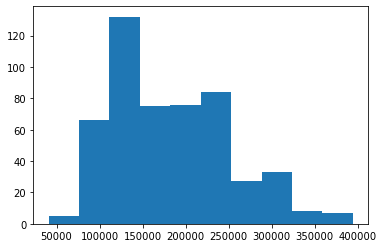

In [64]:
plt.hist(y_preds)

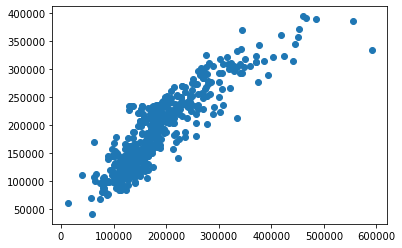

In [70]:
plt.scatter(x=y_test, y=y_preds)

(-250000.0, 250000.0)

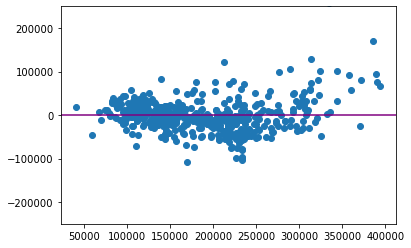

In [74]:
plt.scatter(y_preds, resids)
plt.axhline(0, color='purple')
plt.ylim(-250000, 250000)

In [75]:
import statsmodels.api as sm

X = features_2
X = sm.add_constant(X)
y = df['saleprice']
ols = sm.OLS(y, X).fit()

ols.summary()

C:\Users\mmoli\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1400.
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:42:26   Log-Likelihood:                -24497.
No. Observations:                2049   AIC:                         4.901e+04
Df Residuals:                    2043   BIC:                         4.904e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.264e+04   8324.675    -11.129      0.000   -1.09e+05   -7.63e+04
gr_liv_area         67.6230      2.530     26.723      0.000      62.660      72.586
bedroom_abvgr    -7289.3455   1272.803     -5.727      0.000   -9785.471   -4793.220
age               1019.3588    131.596      7.746      0.000     761.282    1277.436
overall_qual      3.379e+04   1215.132     27.809      0.000    3.14e+04    3.62e+04
age*overall_qual  -250.4204     21.027    -11.910      0.000    -291.656    -209.185
==============================================================================
Omnibus:                      545.023   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30554.776
Skew:                          -0.359   Prob(JB):                         0.00
Kurtosis:                      21.904   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3

##### Features 3

In [9]:
features_3 = df[['gr_liv_area', 'bedroom_abvgr', 'age','overall_qual', 'age*overall_qual', 'kitchen_qual_order']]

In [10]:
X = features_3
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
model_3.score(X_train, y_train), model_3.score(X_test, y_test)
print(f'r2 train  = {model_3.score(X_train, y_train)}')
print(f'r2 test   = {model_3.score(X_test, y_test)}')

r2 train  = 0.778761547814123
r2 test   = 0.7997968849318385


In [11]:
y_preds = model_3.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_3, X_train, y_train, cv=5).mean()
print(f'cvs = {cvs}')

residual mean = -727.3213927221524
mae = 25551.152142605806
rmse = 35683.1447124495
cvs = 0.7678186550307776


* Underfit - add more variables

#### Model 4

##### Features 4

In [12]:
features_4 = df[['gr_liv_area', 'bedroom_abvgr', 'age','overall_qual', 'age*overall_qual', 'kitchen_qual_order', 'gr_liv_area/totrms_abvgrd', 'since_remod/add']]

In [13]:
X = features_4
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
model_4.score(X_train, y_train), model_4.score(X_test, y_test)
print(f'r2 train  = {model_4.score(X_train, y_train)}')
print(f'r2 test   = {model_4.score(X_test, y_test)}')

r2 train  = 0.778811777208161
r2 test   = 0.7999180749917192


In [14]:
y_preds = model_4.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_4, X_train, y_train, cv=5).mean()
print(f'cvs mean = {cvs}')

residual mean = -693.2218082396726
mae = 25528.129913671335
rmse = 35672.34293977033
cvs mean = 0.7670283944705635


* No improvement after 2 latest additions, perhaps disregard additions
* look at eda

#### Model 5

##### Features 5

In [15]:
features_5 = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual',
       'age*overall_qual', 'gr_liv_area/totrms_abvgrd', 'full_bath', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf']]

In [16]:
X = features_5
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
model_5.score(X_train, y_train), model_5.score(X_test, y_test)
print(f'r2 train  = {model_5.score(X_train, y_train)}')
print(f'r2 test   = {model_5.score(X_test, y_test)}')

r2 train  = 0.7991156157025939
r2 test   = 0.8428707155752143


In [17]:
y_preds = model_5.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_5, X_train, y_train, cv=5).mean()
print(f'cvs mean = {cvs}')

residual mean = -145.15867084646786
mae = 22588.40654874369
rmse = 31612.312924112717
cvs mean = 0.7783122407933151


* Underfit - add more variables

#### Model 6

##### Features 6

In [18]:
df['before_1940'] = [1 if year < 1940 else 0 for year in df['year_built']]
df['over_10'] = [1 if age > 10 else 0 for age in df['age']]

In [20]:
features_6 = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual',
       'age*overall_qual', 'gr_liv_area/totrms_abvgrd', 'full_bath', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf', 'before_1940', 'over_10']]

In [21]:
X = features_6
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_6 = LinearRegression()
model_6.fit(X_train, y_train)
model_6.score(X_train, y_train), model_6.score(X_test, y_test)
print(f'r2 train  = {model_6.score(X_train, y_train)}')
print(f'r2 test   = {model_6.score(X_test, y_test)}')

r2 train  = 0.800572277092813
r2 test   = 0.8455229844123753


In [22]:
y_preds = model_6.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_6, X_train, y_train, cv=5).mean()
print(f'cvs mean = {cvs}')

residual mean = -316.64987179130594
mae = 22320.435459316155
rmse = 31344.37692448818
cvs mean = 0.780040902878807


* Underfit - add more variables

#### Model 7

##### Features 7

In [47]:
features_7 = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual',
       'age*overall_qual', 'gr_liv_area/totrms_abvgrd', 'full_bath', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf', 'before_1940', 'over_10', 'neighborhood']]

features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [48]:
X = features_7
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_7 = LinearRegression()
model_7.fit(X_train, y_train)
model_7.score(X_train, y_train), model_7.score(X_test, y_test)
print(f'r2 train  = {model_7.score(X_train, y_train)}')
print(f'r2 test   = {model_7.score(X_test, y_test)}')

r2 train  = 0.8322662427002475
r2 test   = 0.8558846284272434


In [49]:
y_preds = model_7.predict(X_test)
resids = y_test-y_preds                     
print(f'residual mean = {resids.mean()}')

mae = mean_absolute_error(y_test, y_preds)
print(f'mae = {mae}')

mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'rmse = {mse}')

cvs = cross_val_score(model_7, X_train, y_train, cv=5).mean()
print(f'cvs mean = {cvs}')

residual mean = -283.7732583089009
mae = 21153.74166769845
rmse = 30274.909865811267
cvs mean = 0.8061180046656788


In [ ]:
# perhaps cut down when going into polynomials

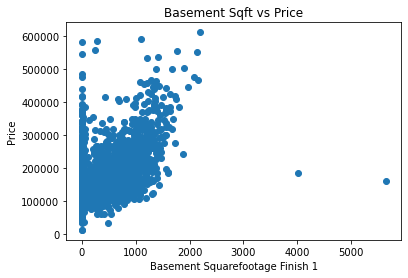

In [77]:
plt.scatter(x=df['bsmtfin_sf_1'], y=df['saleprice'])
plt.xlabel('Basement Squarefootage Finish 1')
plt.ylabel('Price')
plt.title('Basement Sqft vs Price');